In [1]:
""" PRE-PROCESSING (INDIVIDUAL 1) """

import csv
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import Binarizer
from numpy import set_printoptions
from sklearn.model_selection import train_test_split

''' Load data and create a dataframe '''

filename = 'train_imperson_without4n7_balanced_data.csv'

df = pd.read_csv(filename,
                header=0,
                na_values=['nan'])


In [2]:
''' View dataframe info '''

# 97,044 rows, 153 columns
# the class is the feature 155
print(df.head())
print(df.info())
print(df.describe())


   1  2  3         5         6         8         9  10  11  12  ...  146  147  \
0  0  0  0  0.000066  0.000066  0.009150  0.009150   0   0   0  ...  0.0    0   
1  0  0  0  0.000014  0.000014  0.000000  0.000000   0   0   0  ...  0.0    0   
2  0  0  0  0.035528  0.035528  0.070588  0.070588   0   0   0  ...  0.0    0   
3  0  0  0  0.005128  0.005128  0.094771  0.094771   0   0   0  ...  0.0    0   
4  0  0  0  0.035116  0.035116  0.070588  0.070588   0   0   0  ...  0.0    0   

   148  149  150  151  152  153  154  155  
0    0    0    0    0    0    0  0.0    0  
1    0    0    0    0    0    0  0.0    0  
2    0    0    0    0    0    0  0.0    0  
3    0    0    0    0    0    0  0.0    0  
4    0    0    0    0    0    0  0.0    0  

[5 rows x 153 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB
None
             1        2        3             5            

In [3]:
''' Delete columns with no values '''

# many features have no values
columnsToDelete = [] 

# if the  feature has std == 0 it means no values or only one value
for key, value in df.iteritems():
    if df[key].std() == 0:
        columnsToDelete.append(key)
        
df = df.drop(columnsToDelete, axis=1)
len(columnsToDelete) # 74 features have been deleted

# the features are now 79
# the observations are perfectly balanced: 50% class 0, 50% class 1 
class_counts = df.groupby('155').size()
print(class_counts)

# this variable with the column names may be useful later
column_names = df.columns.values


155
0    48522
1    48522
dtype: int64


5      17.200153
6      17.200153
8       1.772145
9       1.772145
14    -67.957971
         ...    
144    43.540914
145     1.783121
146     1.783121
154     1.783549
155     0.000000
Length: 79, dtype: float64


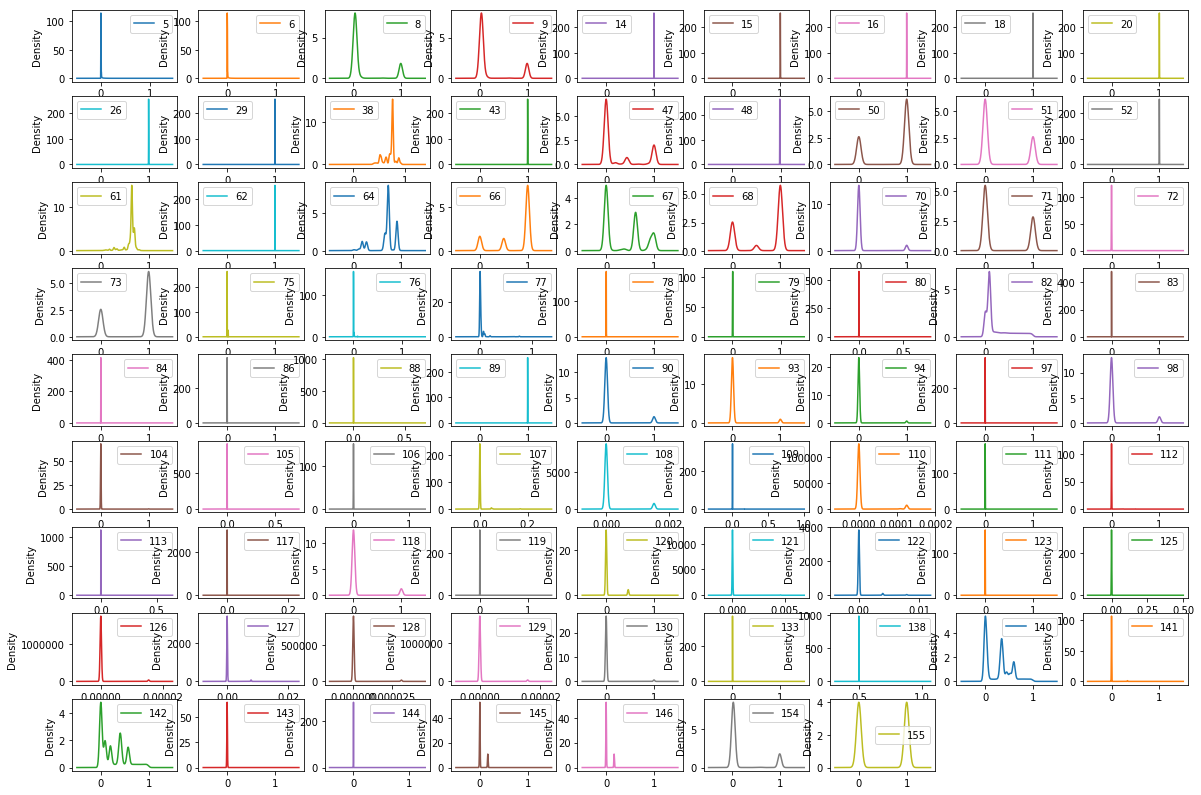

In [7]:
''' Analysis and plotting of the dataframe df shows that none of the features has a normal form '''

# the plots requiring a certain amount of time have been commented out
# skewness
skew = df.skew()
print(skew)

# histogram plot
df.hist(figsize=(30,14))
pyplot.show()

# density plot
# df.plot(kind='density', subplots=True, layout=(9,9), sharex=False, figsize=(20,14))
# pyplot.show()

# Box and Whisker Plot
# df.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,14))
# pyplot.show()

# Scatterplot Matrix
# commented out as it takes a lot to run

# from pandas.plotting import scatter_matrix
# scatter_matrix(df, figsize=[20, 20])
# pyplot.show()


In [11]:
''' Standardisation, Normalisation and PowerTransformer have no effect on the normal form,
    then decided to binarise the non-binary features'''

# binarise the original full dataframe
array = df.values
X = array[:, 0:78].astype(int)
Y = array[:, 78].astype(int)

binarizer = Binarizer(threshold=0.5).fit(X)
binaryX = binarizer.transform(X)

df_binarized = pd.DataFrame(binaryX, columns=column_names[0:78])
df_binarized.insert(78, '155', Y, True)
print(df_binarized.head(10))


   5  6  8  9  14  15  16  18  20  26  ...  138  140  141  142  143  144  145  \
0  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
1  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
2  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
3  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
4  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
5  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
6  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
7  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
8  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   
9  0  0  0  0   1   1   1   1   1   1  ...    0    0    0    0    0    0    0   

   146  154  155  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0  

In [ ]:
""" 
Now we have the following dataframes to test:
    
    - full dataframe with 78 features + 1 class and its binarized version
    df 
    df_binarized 

"""
